In [46]:
import yfinance as yf

# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract stock data with max period
tesla_data = tesla.history(period="max")

# Reset index and display first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [47]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# Fetch HTML content
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find the Tesla Quarterly Revenue table
table = soup.find_all("table", class_="historical_data_table")[1]

# Parse table data into DataFrame
tesla_revenue = pd.read_html(str(table))[0]
tesla_revenue.columns = ["Date", "Revenue"]  # Rename columns
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace('$', '').str.replace(',', '').astype(float)
tesla_revenue.dropna(inplace=True)  # Drop missing values

# Display last 5 rows
tesla_revenue.tail()

/tmp/ipykernel_599/910823397.py:17: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



,Date,Revenue
58,2010-09-30,31.0
59,2010-06-30,28.0
60,2010-03-31,21.0
62,2009-09-30,46.0
63,2009-06-30,27.0


In [48]:
# Create a Ticker object for GameStop (GME)
gamestop = yf.Ticker("GME")

# Extract stock data with max period
gme_data = gamestop.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [49]:
# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find the GameStop Quarterly Revenue table
table = soup.find_all("table", class_="historical_data_table")[1]

# Parse table data into DataFrame
gme_revenue = pd.read_html(str(table))[0]
gme_revenue.columns = ["Date", "Revenue"]  # Rename columns
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace('$', '').str.replace(',', '').astype(float)
gme_revenue.dropna(inplace=True)  # Drop missing values

# Display last 5 rows
gme_revenue.tail()

/tmp/ipykernel_599/2315508980.py:10: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



,Date,Revenue
60,2010-01-31,3524.0
61,2009-10-31,1835.0
62,2009-07-31,1739.0
63,2009-04-30,1981.0
64,2009-01-31,3492.0


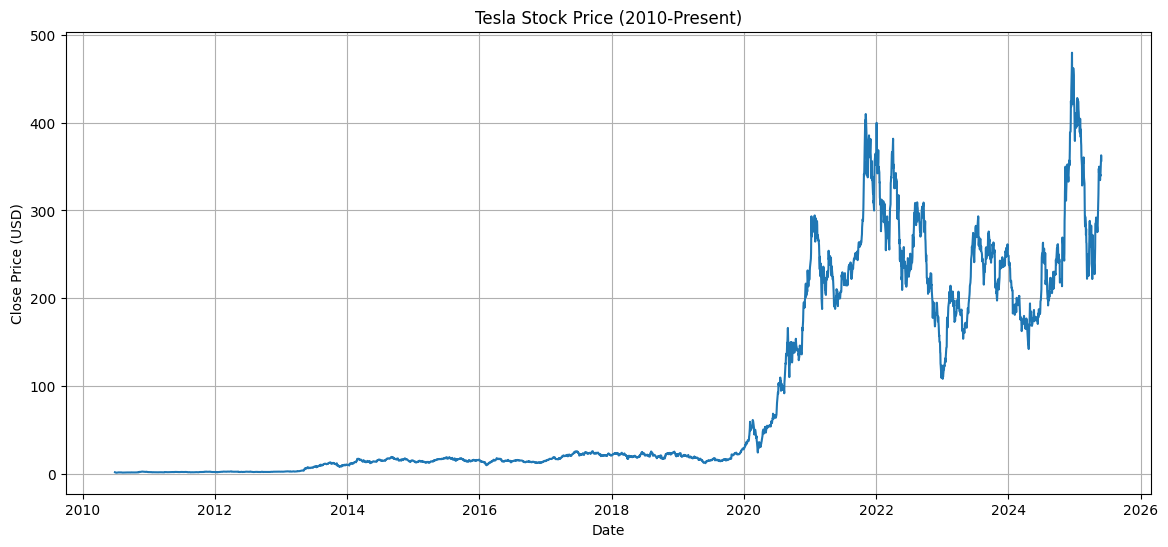

In [53]:
import matplotlib.pyplot as plt

# Function to plot stock data
def make_graph(data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data["Date"], data["Close"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.grid(True)
    plt.show()

# Plot Tesla stock data
make_graph(tesla_data, "Tesla Stock Price (2010-Present)")

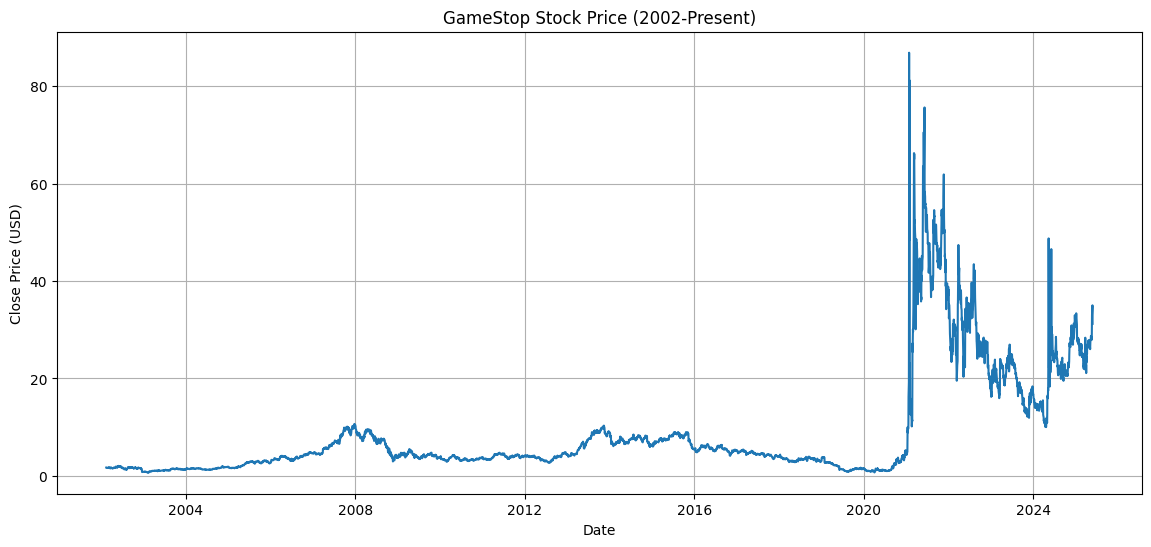

In [51]:
# Plot GameStop stock data
make_graph(gme_data, "GameStop Stock Price (2002-Present)")